# Applied Machine Learning with Scikit Learn - Regressions

*Adapted from https://github.com/justmarkham*

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this tutorial we will see some basic example of Linear Regression for prediction and Logistic Regression for classification.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

# Prediction with Linear Regression

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dim. reduction|clustering|

### Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods


Let's import the dataset:

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

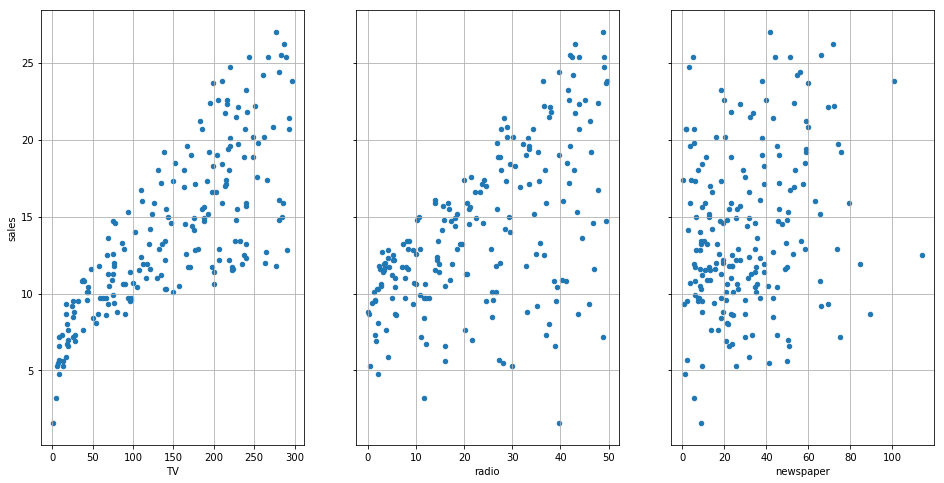

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

## Hands on!
Let's create the features and class vectors (X and y)

In [5]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides a easy way to tran the model:

In [6]:
logistic = LinearRegression()  # create the model
logistic.fit(X, y)  # train it

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Back to the theory! Let's see how the formula looks:

In [7]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic.intercept_)

0.04576464545539761 * TV + 
0.18853001691820462 * radio + 
-0.0010374930424762972 * newspaper + 
2.93888936946




$$y = \beta_0 + \beta_1  \times TV + \beta_1  \times radio + \beta_1  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

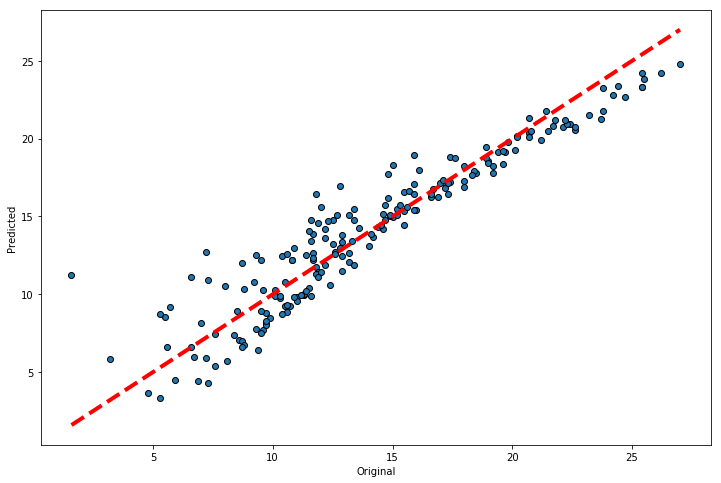

In [8]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

# Classification with Logistic Regression

||continuous|categorical|
|---|---|---|
|**supervised**|regression|**classification**|
|**unsupervised**|dim. reduction|clustering|

Let's go back to the Titanic dataset. We are interessed in predicting the 'survived' variable given the feature of the passenger. For the sake of simplicity, we consider only 4 features:

- pclass
- sex
- age
- fare

In [9]:
titanic_raw = pd.read_excel('titanic.xls')
titanic = titanic_raw[['pclass', 'sex', 'age', 'fare', 'survived']].dropna(axis=0, how='any')
titanic.head()

,pclass,sex,age,fare,survived
0,1,female,29.0000,211.3375,1
1,1,male,0.9167,151.5500,1
2,1,female,2.0000,151.5500,0
3,1,male,30.0000,151.5500,0
4,1,female,25.0000,151.5500,0


In [10]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(dead), len(survived)))

Survived 618, Dead 427


Specify the columns to use as features and the labels for the traning:

In [11]:
titanic_features = ['pclass', 'sex', 'age', 'fare']
titanic_class = 'survived'

#### Q: How is the age distribution between the two groups?

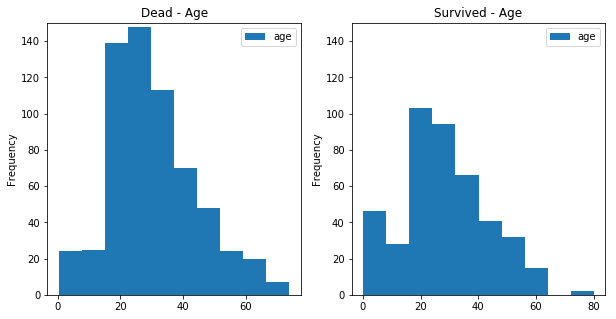

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5));

dead_age = dead[['age']]
survived_age = survived[['age']]

dead_age.plot.hist(ax=axes[0], ylim=(0, 150), title='Dead - Age')
survived_age.plot.hist(ax=axes[1], ylim=(0, 150), title='Survived - Age')


Visible difference for young children.

### Let's prepare the feature vector for the training

The dataset contains categorical variable: sex (male|female)

We need to convert it in vector format. Pandas offers the method *get_dummies* that takes care of this expansion

In [13]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()

,pclass,age,fare,sex_female,sex_male
0,1,29.0000,211.3375,1,0
1,1,0.9167,151.5500,0,1
2,1,2.0000,151.5500,1,0
3,1,30.0000,151.5500,0,1
4,1,25.0000,151.5500,1,0


The labels used for the traning:

In [14]:
y = titanic['survived']

Let's create a new model...

In [15]:
logistic = LogisticRegression()

... and evaluate the precison/recall with a cross validation (10 splits).

**Scikit-Learn** offers this convenient menthod to split the dataset and evaluate the performance.

In [16]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.73 (+/- 0.19)
Recall: 0.70 (+/- 0.30)


### Explore the model output

Let's train on the full dataset

In [17]:
logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Given one sample, logistic regression generates the probability of belonging to the positive class. With **Scikit-Learn** we can access to this value thanks to the method *predict_proba*

In [18]:
pred = logistic.predict_proba(X)
pred

array([[ 0.07484094,  0.92515906],
       [ 0.30310346,  0.69689654],
       [ 0.03830374,  0.96169626],
       ..., 
       [ 0.89306865,  0.10693135],
       [ 0.89447146,  0.10552854],
       [ 0.89983396,  0.10016604]])

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you survive?

In [19]:
X.columns

Index(['pclass', 'age', 'fare', 'sex_female', 'sex_male'], dtype='object')

In [20]:
logistic.predict([[3, 25, 200, 0, 1]])

array([0])

In [21]:
logistic.predict_proba([[3, 25, 200, 0, 1]])

array([[ 0.85695174,  0.14304826]])

In [22]:
logistic.predict([[3, 25, 200, 1, 0]])

array([1])

In [23]:
logistic.predict_proba([[3, 25, 200, 1, 0]])

array([[ 0.3469664,  0.6530336]])